Reading the Dataset
Read the dataset into the Pandas DataFrame!
Does the dataset include any missing values? If so, delete the missing values’ entries!
Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd
df = pd.read_csv('results.csv')

In [2]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


Exploring the Dataset

Answer the following questions about the dataset using Python commands:

Hint: each question should require few lines of code!

1- How many tuples are there in the dataset?

In [3]:
print('1- Total number of Tuples in the Dataset = ', len(df))

1- Total number of Tuples in the Dataset =  42650


2- How many tournaments are there in the dataset?

In [4]:
print('2- Total number tournaments in the dataset = ', len(df.tournament.unique()))

2- Total number tournaments in the dataset =  120


Convert and Deduce

Hint: use the date column.

3- Convert the column date to timestamps!

In [5]:
# Column Date data type is Object
df.date.describe()

count          42650
unique         15341
top       2012-02-29
freq              66
Name: date, dtype: object

In [6]:
import numpy as np

In [7]:
# 3- Covnverted date and added a new column called date_timestamp
df['date_timestamp']=pd.to_datetime(df['date'])

In [8]:
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_timestamp
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08


In [9]:
# Column data_timestamp data type
df.date_timestamp.describe()

C:\Users\abdul\AppData\Local\Temp\ipykernel_26156\3753112712.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date_timestamp.describe()


count                   42650
unique                  15341
top       2012-02-29 00:00:00
freq                       66
first     1872-11-30 00:00:00
last      2021-09-09 00:00:00
Name: date_timestamp, dtype: object

In [10]:
df.groupby(df.date_timestamp.dt.year).count()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_timestamp
date_timestamp,,,,,,,,,,
1872,1,1,1,1,1,1,1,1,1,1
1873,1,1,1,1,1,1,1,1,1,1
1874,1,1,1,1,1,1,1,1,1,1
1875,1,1,1,1,1,1,1,1,1,1
1876,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
2017,958,958,958,958,958,958,958,958,958,958
2018,908,908,908,908,908,908,908,908,908,908
2019,1156,1156,1156,1156,1156,1156,1156,1156,1156,1156


4- Find out how many matches in the dataset were played in 2018.

In [11]:
print('4- Total number of matches played in 2018 = ', len(df[df.date_timestamp.dt.year == 2018]))

4- Total number of matches played in 2018 =  908


Team Statistics

5- Calculate how many times the home team won, lost, or had a draw.

In [12]:
df['home_performance']=df['home_score']-df['away_score']

In [13]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_timestamp,home_performance
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04,3
...,...,...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False,2021-09-09,2
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,2021-09-09,1
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False,2021-09-09,1
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,2021-09-09,3


In [14]:
#Grouping is not benificial
df.groupby(df.home_performance).count()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,date_timestamp
home_performance,,,,,,,,,,
-21,1,1,1,1,1,1,1,1,1,1
-20,3,3,3,3,3,3,3,3,3,3
-19,2,2,2,2,2,2,2,2,2,2
-18,5,5,5,5,5,5,5,5,5,5
-17,1,1,1,1,1,1,1,1,1,1
-16,3,3,3,3,3,3,3,3,3,3
-15,5,5,5,5,5,5,5,5,5,5
-14,3,3,3,3,3,3,3,3,3,3
-13,8,8,8,8,8,8,8,8,8,8


In [15]:
print ('Total matches won by home team = ', len(df[df.home_performance>0]))
print ('Total matches lost by home team = ', len(df[df.home_performance<0]))
print ('Total matches the home team had a draw = ', len(df[df.home_performance==0]))

Total matches won by home team =  20739
Total matches lost by home team =  12074
Total matches the home team had a draw =  9837


Visualization

6 -Plot the numbers extracted from Step 5 in a pie chart.

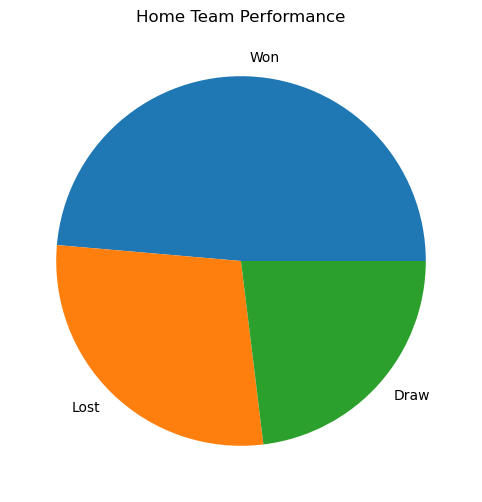

In [16]:
# 6 - Plot home team performance in a pie chart
import matplotlib.pyplot as plt
import numpy as np

home_performance_plt = np.array([len(df[df.home_performance>0]), len(df[df.home_performance<0]), len(df[df.home_performance==0])])
mylabels = ["Won", "Lost", "Draw"]

plt.figure(figsize=(16,6))
plt.title('Home Team Performance')
plt.pie(home_performance_plt, labels = mylabels)
plt.show()


7- Plot the neutral column as a pie chart.

Hint: try to Visualize the neutral column using Pandas (only one line of code)

In [17]:
df.neutral.describe()

count     42650
unique        2
top       False
freq      32076
Name: neutral, dtype: object

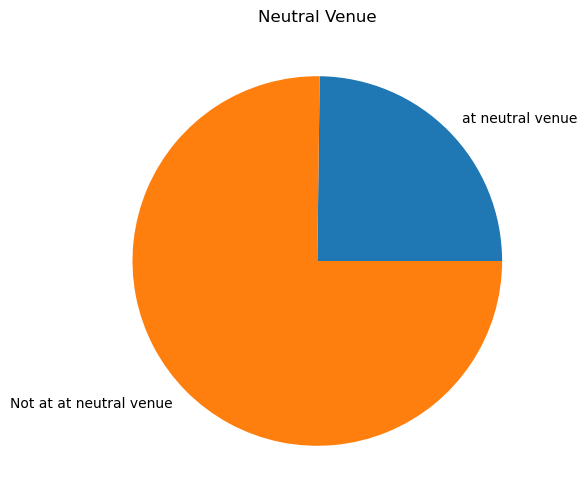

In [18]:
# 7 - Plot of neutral column
neutral_plt = np.array([len(df[df.neutral == True]), len(df[df.neutral == False])])
mylabels_2 = ["at neutral venue", "Not at at neutral venue"]

plt.figure(figsize=(16,6))
plt.title('Neutral Venue')
plt.pie(neutral_plt, labels = mylabels_2)
plt.show()

Unique Teams

8- How many unique teams are there in the dataset? Find out!

In [19]:
full_list = pd.concat([df.home_team, df.away_team], axis = 0)

In [20]:
print('8- Total number of unique teams in the list = ', len(full_list.unique()))

8- Total number of unique teams in the list =  313
